# Arbol de Decision de Clasificacion

Para consultar la documentacion: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

## 1.- Importando paquetes y el conjunto de datos

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


## 2.- Exploracion y Preprocesamiento de los Datos

**El método 'info()'los tipos y números de datos**

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


**El método 'describe()' obtiene un resumen de estadísticas de las características del conjunto de datos**

In [3]:
df.describe(percentiles=[0.1,0.25,0.5,0.75,0.9])

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
10%,45.000000,0.000000,67.600000,0.000000,25.000000,0.000000,153000.000000,0.80000,132.000000,0.000000,0.00000,26.800000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
90%,75.400000,1.000000,1203.800000,1.000000,60.000000,1.000000,374600.000000,2.10000,141.200000,1.000000,1.00000,244.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


## 3.- Modelado

**Empezaremos Definiendo nuestras variables predictoras y nuestra variable respuesta**

In [4]:
# Definimos la variable respuesta y la variable predictora
target = 'DEATH_EVENT'
predictoras = ['time','ejection_fraction','serum_creatinine','age']

In [5]:
# Obtenemos del dataframe el conjunto de datos
X = df[predictoras]
y = df[target]
#Visualizamos las variables predictoras
print('\n\nVisualizamos la variable predictora/independiente (X)')
display(X)
print('\n\nVisualizamos la variable respuesta/dependiente (Y)')




Visualizamos la variable predictora/independiente (X)


,time,ejection_fraction,serum_creatinine,age
0,4,20,1.9,75.0
1,6,38,1.1,55.0
2,7,20,1.3,65.0
3,7,20,1.9,50.0
4,8,20,2.7,65.0
...,...,...,...,...
294,270,38,1.1,62.0
295,271,38,1.2,55.0
296,278,60,0.8,45.0
297,280,38,1.4,45.0




Visualizamos la variable respuesta/dependiente (Y)


In [6]:
# Generamos el conjunto de train y test gracias a sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [7]:
#Revisamos los tamaños de las pruebas de train y test
print("Tamaño del conjunto de datos Inicial:", df.shape)
print("Tamaño del conjunto de características del entrenamiento:",X_train.shape)
print("Tamaño del conjunto de características de prueba:",X_test.shape)
print("Tamaño de la variable objetivo del entrenamiento:",y_train.shape)
print("Tamaño de la variable objetivo de prueba:",y_test.shape)

Tamaño del conjunto de datos Inicial: (299, 13)
Tamaño del conjunto de características del entrenamiento: (209, 4)
Tamaño del conjunto de características de prueba: (90, 4)
Tamaño de la variable objetivo del entrenamiento: (209,)
Tamaño de la variable objetivo de prueba: (90,)


### 3.1.- Arbol de Decision

In [8]:
# Importamos el Modelo del Arbol de Regresión y metodo para graficar
from sklearn.tree import DecisionTreeClassifier, plot_tree
# Importamos las metricas de la regresion
from sklearn import metrics
# Creamos el modelo de Arbol de Decision de Regresion
tree_model = DecisionTreeClassifier(random_state=123,max_leaf_nodes=4)

In [9]:
# Entrenamiento del modelo
tree_model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=4,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

In [10]:
# Predecimos la data de entrenamiento y la data del test
train_pred=tree_model.predict(X_train)
test_pred=tree_model.predict(X_test)

In [11]:
#Vemos la matriz de confusion del train y el test
from sklearn.metrics import classification_report, confusion_matrix
print('Visualizando la matriz de confusion del train:\n')
print(confusion_matrix(y_train, train_pred))
print('\nVisualizando la matriz de confusion del test:\n')
print(confusion_matrix(y_test, test_pred))

Visualizando la matriz de confusion del train:

[[141   9]
 [ 15  44]]

Visualizando la matriz de confusion del test:

[[51  2]
 [16 21]]


In [12]:
# Calculando las principales metricas
print("Calculando el Accuracy o Precision Global del Modelo")
print("Accuracy del Train:", metrics.accuracy_score(y_train,train_pred))
print("Accuracy del Test:", metrics.accuracy_score(y_test,test_pred))
print("\nCalculando la Sensibilidad o Recall")
print("Sensibilidad del Train:", metrics.recall_score(y_train,train_pred))
print("Sensibilidad del Test:", metrics.recall_score(y_test,test_pred))
print("\nCalculando la Precision del Modelo")
print("Precision del Train:", metrics.precision_score(y_train,train_pred))
print("Precision del Test:", metrics.precision_score(y_test,test_pred))

Calculando el Accuracy o Precision Global del Modelo
Accuracy del Train: 0.8851674641148325
Accuracy del Test: 0.8

Calculando la Sensibilidad o Recall
Sensibilidad del Train: 0.7457627118644068
Sensibilidad del Test: 0.5675675675675675

Calculando la Precision del Modelo
Precision del Train: 0.8301886792452831
Precision del Test: 0.9130434782608695


### 3.2.- Mejor Modelo Con GreadSearch

In [13]:
#Importamos el método GridSearch
from sklearn.model_selection import GridSearchCV
#Definimos los parametos del Gread Search
params = {'max_depth':list(range(2,11)),
          'min_samples_leaf':[x / 100 for x in range(1, 11)]}
#Creamos el Objeto gread search
grid = GridSearchCV(tree_model, param_grid=params, scoring='accuracy', verbose=1, return_train_score=True)

In [14]:
#Entrenando con GridSearch
grid.fit(X_train,y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:    2.2s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=4,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=123,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
           

In [15]:
#Obtenemos el mejor estimador
grid.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=4,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=0.05, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

In [16]:
#Probamos el mejor estimador
tree_model = DecisionTreeClassifier(max_depth= 2, min_samples_leaf = 0.01, random_state=123)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=0.01, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

In [17]:
# Predecimos la data de entrenamiento y la data del test
train_pred=tree_model.predict(X_train)
test_pred=tree_model.predict(X_test)

In [18]:
# Calculando las principales metricas
print("Calculando el Accuracy o Precision Global del Modelo")
print("Accuracy del Train:", metrics.accuracy_score(y_train,train_pred))
print("Accuracy del Test:", metrics.accuracy_score(y_test,test_pred))
print("\nCalculando la Sensibilidad o Recall")
print("Sensibilidad del Train:", metrics.recall_score(y_train,train_pred))
print("Sensibilidad del Test:", metrics.recall_score(y_test,test_pred))
print("\nCalculando la Precision del Modelo")
print("Precision del Train:", metrics.precision_score(y_train,train_pred))
print("Precision del Test:", metrics.precision_score(y_test,test_pred))

Calculando el Accuracy o Precision Global del Modelo
Accuracy del Train: 0.8708133971291866
Accuracy del Test: 0.7888888888888889

Calculando la Sensibilidad o Recall
Sensibilidad del Train: 0.6949152542372882
Sensibilidad del Test: 0.5135135135135135

Calculando la Precision del Modelo
Precision del Train: 0.82
Precision del Test: 0.95


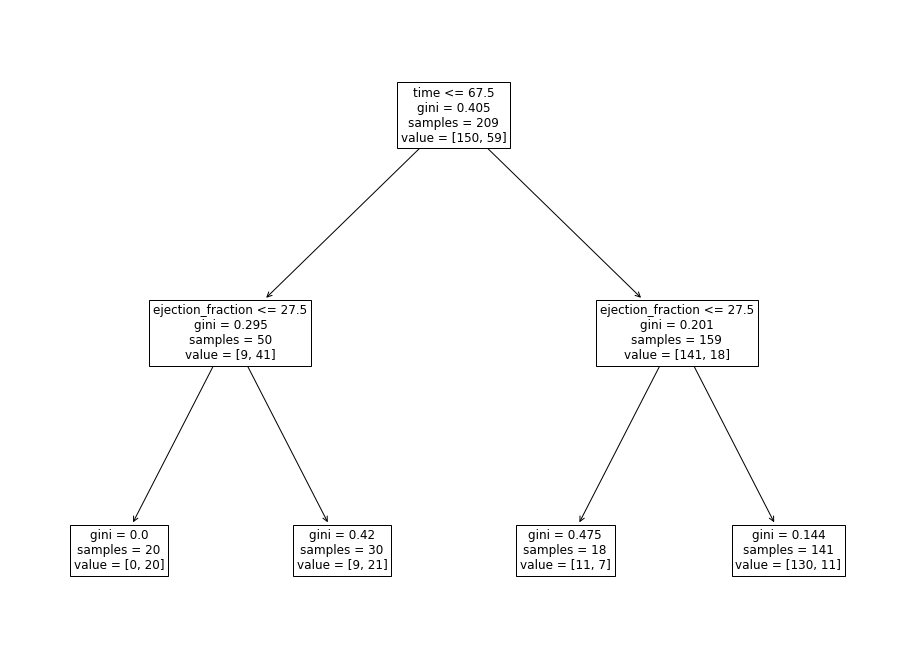

In [19]:
#Graficando el Arbol
fig, ax = plt.subplots(figsize=(16, 12))
plot_tree(tree_model, feature_names = X_train.columns, fontsize=12)
plt.show()  